# Library import

In [1]:
import numpy as np
from skimage import io, color, exposure, transform
from skimage.color import rgb2gray
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split  #it came from update scikit learn. https://stackoverflow.com/questions/40704484/importerror-no-module-named-model-selection
import os
import glob
import h5py

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D,Conv1D
from keras.layers.pooling import MaxPooling2D

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import backend as K
K.set_image_data_format('channels_first')

from matplotlib import pyplot as plt
%matplotlib inline

#import keras

NUM_CLASSES = 9  #how many different type of class/type of image you are using. Like CAT,DOG, ELEPHANT etc
IMG_SIZE = 8  # You can change it. Always keep same size for width and height. That means square size.
number_filter = 1

Using TensorFlow backend.


# Function for preprocessing image. Able for RGB & Gray Image

In [2]:
#for gray scale
def preprocess_img(img):
    # Histogram normalization in y
#     hsv = color.rgb2hsv(img)
#     hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
#     img = color.hsv2rgb(hsv)

    # central scrop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]
    img = rgb2gray(img)

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img,-1)

    return img

def get_class(img_path):
    return int(img_path.split('/')[-2])

# Store the image and label in array. Run this cell if you need to do training. For testing no need to run it

In [3]:
imgs = []
labels = []
root_dir = '/home/atif/training_by_several_learning_process/number_classify/rgb_2_gray/Image-classification/train_image/'
#path='/home/atif/training_by_several_learning_process/flower_photos/00000/'

#all_img_paths = glob.glob(path+ '5547758_eea9edfd54_n_000.jpg')

all_img_paths = glob.glob(os.path.join(root_dir, '*/*.ppm')) #I have done the training with .ppm format image. If another type of image will come 
                                                                                    #them .ppm will be changed by that extension
np.random.shuffle(all_img_paths)
for img_path in all_img_paths:
    try:
        img = preprocess_img(io.imread(img_path))
        label = get_class(img_path)
        imgs.append(img)
        labels.append(label)

        if len(imgs)%1000 == 0: print("Processed {}/{}".format(len(imgs), len(all_img_paths)))
            #print("get it 2")
    except (IOError, OSError):
        print('missed', img_path)
        pass

X = np.array(imgs, dtype='float32') #Keeping the image as an array
Y = np.eye(NUM_CLASSES, dtype='uint8')[labels] #labels of the image

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Processed 1000/11760
Processed 2000/11760
Processed 3000/11760
Processed 4000/11760
Processed 5000/11760
Processed 6000/11760
Processed 7000/11760
Processed 8000/11760
Processed 9000/11760
Processed 10000/11760
Processed 11000/11760


In [4]:
print(X)

[[[0.76919025 0.32189628 0.2273481  ... 0.21794105 0.22829272 0.21064721]
  [0.73161405 0.28086147 0.2506112  ... 0.21749552 0.210531   0.19964282]
  [0.55422574 0.3046039  0.22301309 ... 0.19688024 0.25614518 0.20815867]
  ...
  [0.65089285 0.31733593 0.22728612 ... 0.4225565  0.25574708 0.20155765]
  [0.6731649  0.28670642 0.29357553 ... 0.26864657 0.19970113 0.19213681]
  [0.6461554  0.2894134  0.25351733 ... 0.20234036 0.1990896  0.17904441]]

 [[0.18091677 0.10739366 0.10090948 ... 0.10366765 0.09820471 0.10365102]
  [0.2082383  0.09576117 0.09590362 ... 0.08534764 0.07293228 0.09577064]
  [0.2732834  0.11383078 0.10841297 ... 0.14726917 0.11341047 0.14480047]
  ...
  [0.18817669 0.1305366  0.15284179 ... 0.19282715 0.15168363 0.10040881]
  [0.23391613 0.06552649 0.11273812 ... 0.13958344 0.06043021 0.06878428]
  [0.27418056 0.06868622 0.07594798 ... 0.08057083 0.06977361 0.06400824]]

 [[0.08161212 0.09100208 0.07255933 ... 0.5536272  0.0869306  0.07656503]
  [0.08206671 0.084676

In [5]:
# X = np.array(imgs, dtype='float32')
print(X.shape)
#plt.imshow(X[0])
# plt.imshow(X[0],cmap="gray")
# plt.imshow(X[0]) #if you use this command here you will see something coloured image. No problem, it is gray image. 
                        #To see full Black and white image uncomment the previous line.
X = X.reshape(len(imgs),1,IMG_SIZE,IMG_SIZE) # write (IMG_SIZE,IMG_SIZE,1 if you want channel last; 1= grayscale;3=RGB)
# plt.imshow(X[0],cmap="gray")
print(X.shape)
print(X.ndim)
print(X[0].shape)

(11760, 8, 8)
(11760, 1, 8, 8)
4
(1, 8, 8)


In [6]:
print(X.shape)
print(Y.shape)

(11760, 1, 8, 8)
(11760, 9)


# making a model. Run it for training and testing

In [7]:
# This model is for understanding the inner calculation of CNN that's why I have started witha minimal layer as well as model.
# Increase the filter number and layer if you want a good result
#Conv2D(1, (3, 3) >> here 1 = number of filter. (3,3) = kernel height and width
# you can just add padding just beside Conv2D. (model.add(Conv2D(1,(3,3)),padding='same',....))
# I haven't added here for remove complexity in c++(I have tried to implement this whole model in testing phase in cpp)
def cnn_model():
#      padding='same'
    model = Sequential()

    model.add(Conv2D(number_filter, (3, 3),
                     input_shape=(1,IMG_SIZE, IMG_SIZE),
                     activation='relu'))
    model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    
    return model

model = cnn_model()

lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
          optimizer=sgd,
          metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 6, 6)           10        
_________________________________________________________________
flatten_1 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 333       
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


# Training phase. Storing the model also for further use

In [10]:
def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size = 32
epochs = 100
train_model= model.fit(X, Y,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          #np.resize(img, (-1, <image shape>)
          callbacks=[LearningRateScheduler(lr_schedule),ModelCheckpoint('/home/atif/training_by_several_learning_process/number_classify/rgb_2_gray/Image-classification/trained_model_text_file/image_size_8_data_type_float_1_filter_trained_model/traffic_model_16_march_ep_100_1_filter.h5', save_best_only=True)])

Train on 9408 samples, validate on 2352 samples
Epoch 1/100
9408/9408 [==============================] - 1s 102us/step - loss: 1.9184 - acc: 0.2647 - val_loss: 1.7629 - val_acc: 0.3495
Epoch 2/100
9408/9408 [==============================] - 0s 37us/step - loss: 1.6676 - acc: 0.3567 - val_loss: 1.5504 - val_acc: 0.4141
Epoch 3/100
9408/9408 [==============================] - 0s 38us/step - loss: 1.5088 - acc: 0.3993 - val_loss: 1.4681 - val_acc: 0.4294
Epoch 4/100
9408/9408 [==============================] - 0s 46us/step - loss: 1.4285 - acc: 0.4305 - val_loss: 1.4198 - val_acc: 0.4422
Epoch 5/100
9408/9408 [==============================] - 0s 47us/step - loss: 1.3823 - acc: 0.4498 - val_loss: 1.3584 - val_acc: 0.4575
Epoch 6/100
9408/9408 [==============================] - 0s 42us/step - loss: 1.3561 - acc: 0.4641 - val_loss: 1.3361 - val_acc: 0.4817
Epoch 7/100
9408/9408 [==============================] - 0s 46us/step - loss: 1.3367 - acc: 0.4679 - val_loss: 1.3460 - val_acc: 0.4779

9408/9408 [==============================] - 1s 54us/step - loss: 1.2419 - acc: 0.5056 - val_loss: 1.2555 - val_acc: 0.5119
Epoch 61/100
9408/9408 [==============================] - 0s 47us/step - loss: 1.2419 - acc: 0.5056 - val_loss: 1.2555 - val_acc: 0.5119
Epoch 62/100
9408/9408 [==============================] - 1s 55us/step - loss: 1.2419 - acc: 0.5056 - val_loss: 1.2555 - val_acc: 0.5119
Epoch 63/100
9408/9408 [==============================] - 1s 53us/step - loss: 1.2419 - acc: 0.5056 - val_loss: 1.2555 - val_acc: 0.5119
Epoch 64/100
9408/9408 [==============================] - 1s 57us/step - loss: 1.2419 - acc: 0.5056 - val_loss: 1.2555 - val_acc: 0.5119
Epoch 65/100
9408/9408 [==============================] - 1s 58us/step - loss: 1.2419 - acc: 0.5056 - val_loss: 1.2555 - val_acc: 0.5119
Epoch 66/100
9408/9408 [==============================] - 0s 49us/step - loss: 1.2419 - acc: 0.5056 - val_loss: 1.2555 - val_acc: 0.5119
Epoch 67/100
9408/9408 [==============================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


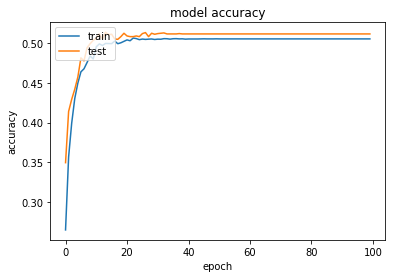

In [11]:
print(train_model.history.keys())
# summarize history for accuracy
plt.plot(train_model.history['acc'])
plt.plot(train_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


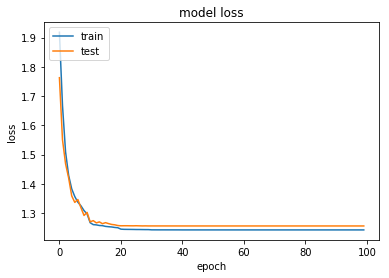

In [12]:
print(train_model.history.keys())
# summarize history for accuracy
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# testing image

In [13]:
from keras.models import load_model
model = load_model('/home/atif/training_by_several_learning_process/number_classify/rgb_2_gray/Image-classification/trained_model_text_file/image_size_8_data_type_float_1_filter_trained_model/traffic_model_16_march_ep_100_1_filter.h5')
#for gray scale
def preprocess_img(img):
#     Histogram normalization in y
#     hsv = color.rgb2hsv(img)
#     hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
#     img = color.hsv2rgb(hsv)

    # central scrop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]
    img = rgb2gray(img)

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img,-1)

    return img

import glob

path = r'/home/atif/training_by_several_learning_process/number_classify/rgb_2_gray/Image-classification/test_image/'

img_path = glob.glob(path+ '/*.ppm')
for image in img_path:
    X_test=[]
    X_test.append(preprocess_img(io.imread(image)))
    X_test = np.array(X_test)
#     plt.imshow(X_test)
    X_test = X_test.reshape(len(X_test),1,IMG_SIZE,IMG_SIZE)
    
    print("\n",image)
    predicted_class = model.predict_classes(X_test)
    print("predicted class: ",predicted_class)
    
    probability = model.predict_proba(X_test)
    print("probability: ",probability)

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "



 /home/atif/training_by_several_learning_process/number_classify/rgb_2_gray/Image-classification/test_image/60_speed.ppm
predicted class:  [3]
probability:  [[4.1180544e-02 2.6751471e-01 6.3266747e-02 3.8749439e-01 6.1824284e-02
  1.5475880e-01 3.2710741e-05 3.3180518e-03 2.0609746e-02]]

 /home/atif/training_by_several_learning_process/number_classify/rgb_2_gray/Image-classification/test_image/50_speed.ppm
predicted class:  [2]
probability:  [[4.14493639e-04 1.47803724e-01 7.00427711e-01 3.83398263e-04
  4.28075194e-02 7.57885817e-03 7.91816565e-05 1.00505166e-01
  3.93878388e-08]]

 /home/atif/training_by_several_learning_process/number_classify/rgb_2_gray/Image-classification/test_image/lorry.ppm
predicted class:  [8]
probability:  [[4.1729960e-04 1.9592341e-02 2.8719585e-03 3.2523319e-02 1.6440089e-01
  1.2677392e-01 3.9836065e-14 1.1409163e-05 6.5340889e-01]]

 /home/atif/training_by_several_learning_process/number_classify/rgb_2_gray/Image-classification/test_image/80_speed.ppm


In [ ]:
print(X_test.shape)
print(X_test.ndim)
# plt.imshow(X_test[0])
X_test_show = X_test.reshape(IMG_SIZE,IMG_SIZE) # Need if you want to see the image\n",
print(X_test_show.shape)
plt.imshow(X_test_show)  # Displaying the image"